In [8]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Large Random Samples

In [4]:
# Here we have the data from last time
# the delays of time for the departure of a flight
united = Table.read_table('united.csv')

# This is just helpful to our table
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

# Bins for our histogram
united_bins = np.arange(-20, 201, 5)

# The entire population visualized as a histogram is below where we 
# look at the delay time 
#This is the Probability Distrubtion!
united.hist('Delay', bins = united_bins)


#Lets look at some empirical distibutions 
#Small sample 
united.sample(100).hist('Delay', bins = united_bins)


#large sample 
united.sample(5000).hist('Delay', bins = united_bins)

# Notice the larger the sample the closer the distrubtion looks to the 
# prbility distriubtion!

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


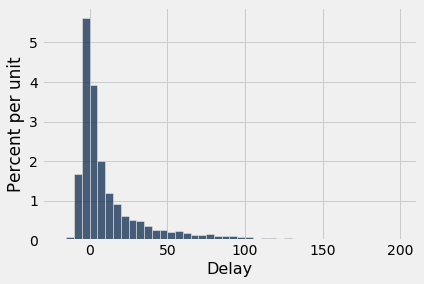

In [4]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

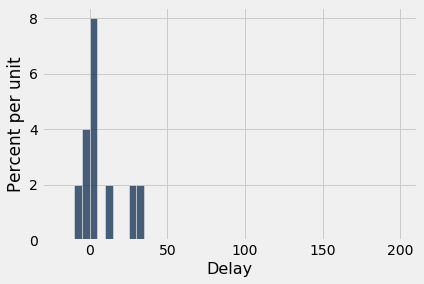

In [5]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

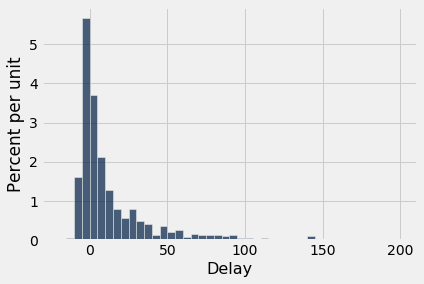

In [6]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [12]:
# (Population) Parameter
np.median(united.column('Delay'))


# recall we computed average parameter and statistics lets do this again


# paramter - numerical value assicatied to entire population
np.average(united.column('Delay'))

# Small sample statsitic
np.average(united.sample(100).column('Delay'))

# Large sample statistic 
np.average(united.sample(5000).column('Delay'))

# Notice that the larger the sample the closer the average is to the parameter!

16.0884

In [8]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

12.0

In [9]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

3.0

### Probability & Empirical Distributions of a Statistic

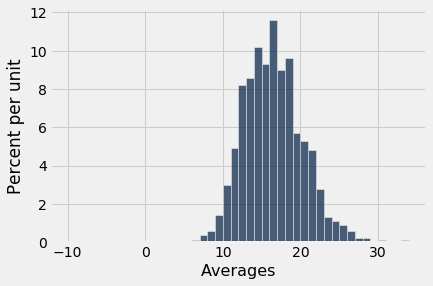

In [19]:
# Lets look at the distribtion of average delay times for a small sample vs a 
#large sample 


# First lets make a function that computes this for us for a given 
#sample


def sample_average(size):
    return np.mean(united.sample(size).column('Delay')) 

# here we make an arry that will hold our stastices 
sample_averages= make_array() # array of averagres

# sample_average is running one sample once and finding the average
# the larger the number the more accurate the measurement

# the for loops is running the sampling 1000 times 
# this gives average values for 1000 iterations 
# there for we can give an estimation on what the values could be!

# first lets look at how it changes with a sample small eaxh iteration
# Then lets look at a large sample for the next iteration

for i in np.arange(1000):
    new_average = sample_average(100)
    sample_averages = np.append(sample_averages,new_average)
    
sample_averages
#bins are made to be clsoed to the acutal average

Table().with_columns('Averages',sample_averages).hist(bins = np.arange(-10,35))


# The thing to notice again these are both Empirical distributions!
# The larger the sample the better the statistic!
# Therefore the larger statistic estimates the parameter average of 
# the entire population much better!
small=Table().with_column('Sample means (size=100)', sample_averages)

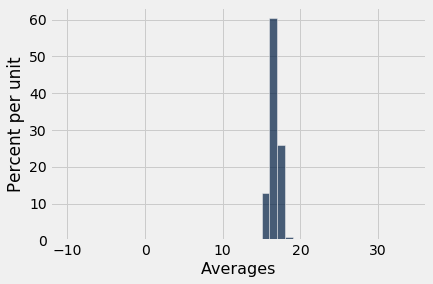

In [22]:
sample_averages= make_array() # array of averagres

# sample_average is running one sample once and finding the average
# the larger the number the more accurate the measurement

# the for loops is running the sampling 1000 times 
# this gives average values for 1000 iterations 
# there for we can give an estimation on what the values could be!

# first lets look at how it changes with a sample small eaxh iteration
# Then lets look at a large sample for the next iteration

for i in np.arange(1000):
    new_average = sample_average(5000)
    sample_averages = np.append(sample_averages,new_average)
    
sample_averages
#bins are made to be clsoed to the acutal average

Table().with_columns('Averages',sample_averages).hist(bins = np.arange(-10,35))
# We can compare the distrubtions of averages with a histogram!
small=small.with_column('Sample averages (size=5000)', sample_averages)

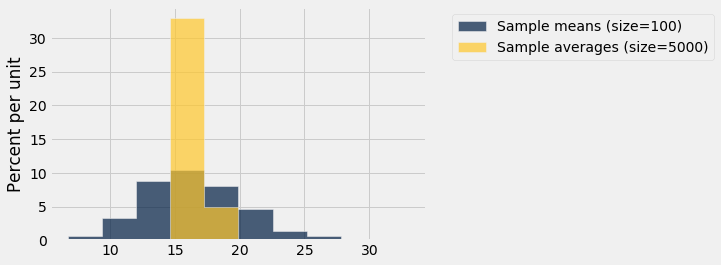

In [23]:
small.hist()
#Notice that histohram shows

In [13]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

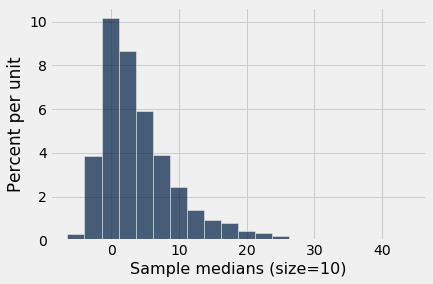

In [14]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [15]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

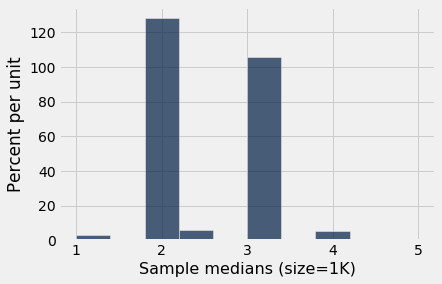

In [16]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

#### Empirical Distributions Overlayed

In [17]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [18]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

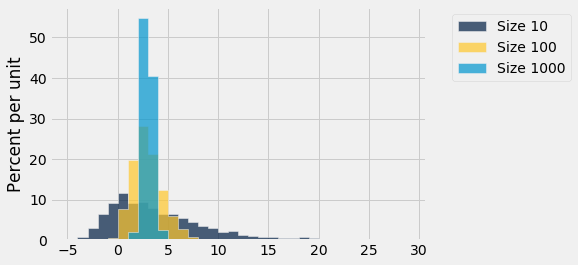

In [19]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [24]:
population_proportions = make_array(.26, .74)
population_proportions

#Here we are making an array for our sample_propotions
#The first number is the proportion of black men in the county
#The second number is the proporiton of white men in the county

array([0.26, 0.74])

In [34]:
sample_proportions(100, population_proportions)#
#This returns a random sampling out of 100
#The numbers in our array our a propotion 
#if we wanted to find the the number of people
#then we wuold multiple by the sample size
#

100*sample_proportions(100, population_proportions)#


array([20., 80.])

In [36]:
#Now we want to check if 8 men out 100 being black from our random sampling 
#is within reason as set by the supreme court

#To do this we need choose a samping where 26 percent of the population is
#black and the remaining is white

#We have done this above 
#We want to run this as a simulation 10000 times so we will write 
#it our expiement as afunction below


def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

#returns the percentage of men who are black that are radnom ly sampled



In [42]:
panel_proportion()

0.27

In [44]:

# we can now runn our simpuation 100 times
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)# add this to our table 

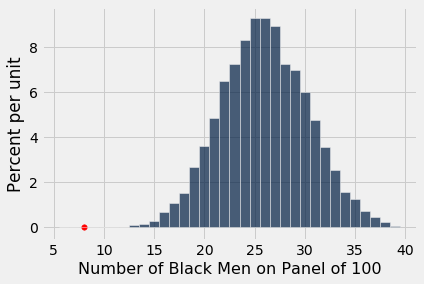

In [46]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))
plots.scatter(8, 0, color='red', s=30);
#what we notice is that most random sample had between 10 amd 40 black 
#men choosen
#almost 100 percent of the time
#


# we are very unlikely to get counts of black men as low as the eight 
#that were in Swain's jury panel. This is evidence that the model of 
#random selection of the jurors in the panel is not consistent with
#the data from the panel. 


#Thus our assessment is that the model of random draws is not 
#supported by the evidence. Swain's jury panel does not
#look like the result of random sampling from the population of eligible jurors.

## Mendel and Pea Flowers ##

In [47]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

# Here is mendels data
#709 had purple flowers out of 929

0.7631862217438106

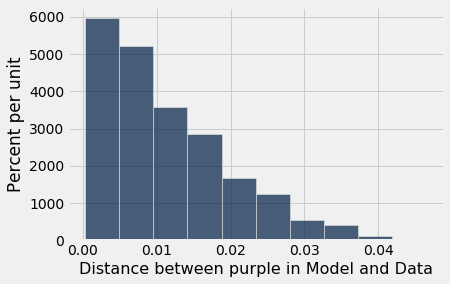

In [63]:
#We begin to take a sampling using sample_proportions
#Input is an array of proporitons
#The out put is an array of sample proportions 


# this is the model data
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)
#random sampling from the model

#find the number of of purple flowers
sample_proportions(929, predicted_proportions).item(0)

#We want to find the distance from the number of puple and 75 percent 
# 

abs(.75-sample_proportions(929, predicted_proportions).item(0))

# When we look at the distance of two numbers, the smaller the number 
# the closer the numbers are 

#Lets now simulate 1000 random samples


purple_distance = make_array()
for i in np.arange(1000):
    dist=abs(.75-sample_proportions(929, predicted_proportions).item(0))
    purple_distance = np.append(purple_distance,dist)

Table().with_columns('Distance between purple in Model and Data',purple_distance).hist()

In [53]:
#he data is consistent with the model
#the data says that out of 1000 trails the percentage of purple flowers 
#is always very close to 75 percent
#The evidiance is in favor of the model!


In [29]:
purple_flowers()

74.59634015069967

In [30]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

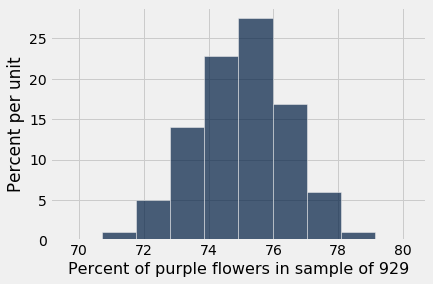

In [31]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

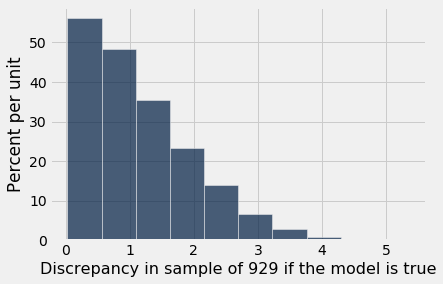

In [32]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [33]:
abs(observed_purples * 100 - 75)

1.318622174381062